In [1]:
#
# P(predicted = 1 | true = 1) - TPR = true positive rate (sometimes called sensitivty)
#

Using Bayes rule:
    
    P(predicted = 1 | true = 1) = P(predicted = 1 , true = 1) / P( true = 1) 
    
    for example for disease classification
    
    P(predicted = 1 | disease = 1) = P(predicted = 1, disease = 1) / P(disease = 1)

***

Four classes 

TP = true positive 

FP = false positive 

FN = false negative

FP = false positive


In [2]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]


In [3]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(tn, fp, fn, tp)

5 1 3 5


In [4]:
from pandas_ml import ConfusionMatrix

cm = ConfusionMatrix(y_true, y_pred)

cm.print_stats()

population: 14
P: 8
N: 6
PositiveTest: 6
NegativeTest: 8
TP: 5
TN: 5
FP: 1
FN: 3
TPR: 0.625
TNR: 0.8333333333333334
PPV: 0.8333333333333334
NPV: 0.625
FPR: 0.16666666666666666
FDR: 0.16666666666666666
FNR: 0.375
ACC: 0.7142857142857143
F1_score: 0.7142857142857143
MCC: 0.4583333333333333
informedness: 0.4583333333333335
markedness: 0.4583333333333335
prevalence: 0.5714285714285714
LRP: 3.75
LRN: 0.44999999999999996
DOR: 8.333333333333334
FOR: 0.375


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report

def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='left')    

    # Plot
    plt.tight_layout()

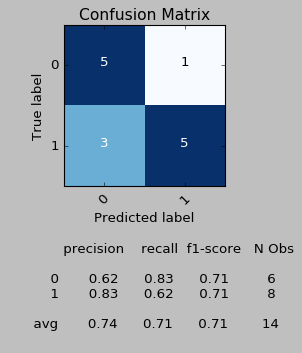

In [6]:
plt.style.use('classic')
plt.figure(figsize=(3,3))
pretty_print_conf_matrix(y_true, y_pred, 
                         classes= ['0', '1'],
                         normalize=False, 
                         title='Confusion Matrix')

In [7]:
#
# Probabilities
#

    
    P(pred = 1 | true = 1) = P(pred = 1 , true = 1) / P(true=1) = using maximum likelihood = 
    
    [TP/N] / [ (TP + FN) / N] = TP / (TP + FN) 
    
    it is a TPR = true positive rate or sensitivty or recall or hit rate

***
    
    P(pred = 0 | true = 0) = P(pred = 0 , true = 0) / P(true=0) = using maximum likelihood =
    
    [TN/N] / [ (TN + FP) / N] = TN / (TN + FP) 
    
    it is a TNR = true negative rate or specificity 

***

     Precision or positive predictive value (PPV) = 
    
     TP / (TP + FP) =
     
     [TP/N] / [(TP + FP)/N] = 
     
     P(pred = 1 | true = 1) / P(true = 1) = 
     
     P(true = 1 | pred = 1) 
     